### Comparison among different observation spaces

In [100]:
import yaml
import pickle
import pandas as pd
import numpy as np
from mushroom_rl.core import Core
from mushroom_rl.algorithms.value import DQN
from mushroom_rl.policy import EpsGreedy
from mushroom_rl.utils.parameters import Parameter
from mushroom_rl.utils.callbacks import CollectDataset, CollectMaxQ

from scripts.dqn.dqn import DQNAgent
from scripts.dqn.env import WaterNetworkEnvironment
from scripts.dqn.logger import InfoLogger
from scripts import objFunction

In [101]:
def build_agent(model_name, state_vars, bounds):
    dqn = DQN.load("../scripts/dqn/saved_models/" + model_name + ".msh")
    
    dqn.env = WaterNetworkEnvironment(
        town='anytown_pd',
        state_vars=state_vars,
        action_vars=['78', '79'],
        duration=604800,
        hyd_step=600,
        pattern_step=3600,
        pattern_file='../demand_patterns/demands_anytown.csv',
        seed=130,
        update_every=14400,
        bounds=bounds,
        logger=InfoLogger(),
        show_plot=None
    )
    
    dqn.epsilon_test = Parameter(value=0.05)
    dqn.pi = EpsGreedy(epsilon=dqn.epsilon_test)
    dqn.scores = []
      
    return dqn

In [102]:
seeds = [130, 131, 132, 133, 134]

In [4]:
state_vars_full = {'time': 0, 'day': 1, 'tanks': ['41', '42'], 'junctions': ['20']} 
state_vars_notime = {'day': 1, 'tanks': ['41', '42'], 'junctions': ['20']} 
state_vars_noday = {'time': 0, 'tanks': ['41', '42'], 'junctions': ['20']} 
state_vars_notanklevel = {'time': 0, 'day': 1, 'junctions': ['20']} 
state_vars_nojuncpressure = {'time': 0, 'day': 1, 'tanks': ['41', '42']} 

bounds_full = {'time': {'min': 0, 'max':86400}, 'day': {'min': 1, 'max':7}, '41_level': {'min': 0, 'max':20}, '42_level': {'min': 0, 'max':20}, '20_pressure': {'min': 10, 'max':100}}
bounds_notime = {'day': {'min': 1, 'max':7}, '41_level': {'min': 0, 'max':20}, '42_level': {'min': 0, 'max':20}, '20_pressure': {'min': 10, 'max':100}}
bounds_noday = {'time': {'min': 0, 'max':86400}, '41_level': {'min': 0, 'max':20}, '42_level': {'min': 0, 'max':20}, '20_pressure': {'min': 10, 'max':100}}
bounds_notanklevel = {'time': {'min': 0, 'max':86400}, 'day': {'min': 1, 'max':7}, '20_pressure': {'min': 10, 'max':100}}
bounds_nojuncpressure = {'time': {'min': 0, 'max':86400}, 'day': {'min': 1, 'max':7}, '41_level': {'min': 0, 'max':20}, '42_level': {'min': 0, 'max':20}}

In [103]:
def model_evaluation(agent):
    results = []
    print('\nObservation space: ', agent.env.state_vars)
    for seed in seeds:
        agent.env.seed = seed
        agent.core = Core(agent, agent.env)
        print('Demand pattern: ', seed)
        dataset, q_values = agent.evaluate(get_data=True, collect_qs=True)
        results.append({'dataset':dataset, 'q_values':q_values})
        
    return results

In [6]:
dqn_full = build_agent('dqn_full', state_vars_full, bounds_full)
dqn_notime = build_agent('dqn_notime', state_vars_notime, bounds_notime)
dqn_noday = build_agent('dqn_noday', state_vars_noday, bounds_noday)
dqn_notanklevel = build_agent('dqn_notanklevel', state_vars_notanklevel, bounds_notanklevel)
dqn_nojuncpressure = build_agent('dqn_nojuncpressure', state_vars_nojuncpressure, bounds_nojuncpressure)

In [7]:
results_full = model_evaluation(dqn_full)
results_notime = model_evaluation(dqn_notime)
results_noday = model_evaluation(dqn_noday)
results_notanklevel = model_evaluation(dqn_notanklevel)
results_nojuncpressure = model_evaluation(dqn_nojuncpressure)

  0%|          | 0/1 [00:00<?, ?it/s]


Observation space:  {'time': 0, 'day': 1, 'tanks': ['41', '42'], 'junctions': ['20']}
Demand pattern:  130
22/07/2021 20:17:44 [INFO] Evaluation..
22/07/2021 20:17:44 [INFO] ---------------------------------------------------------------------------------------------------


C:\Users\david\Documents\PyCharmProjects\msc_thesis\epynet\baseobject.py:64: UserWarning: requesting dynamic properties from an unsolved network
  warnings.warn("requesting dynamic properties from an unsolved network")
  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9424227947004257
Total updates: 14
22/07/2021 20:19:03 [INFO] ###################################################################################################
Demand pattern:  131
22/07/2021 20:19:03 [INFO] Evaluation..
22/07/2021 20:19:03 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9423057581384855
Total updates: 14
22/07/2021 20:20:21 [INFO] ###################################################################################################
Demand pattern:  132
22/07/2021 20:20:21 [INFO] Evaluation..
22/07/2021 20:20:21 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.940833591181327
Total updates: 15
22/07/2021 20:21:39 [INFO] ###################################################################################################
Demand pattern:  133
22/07/2021 20:21:39 [INFO] Evaluation..
22/07/2021 20:21:39 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9424560753541948
Total updates: 17
22/07/2021 20:22:59 [INFO] ###################################################################################################
Demand pattern:  134
22/07/2021 20:22:59 [INFO] Evaluation..
22/07/2021 20:22:59 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9223578522813147
Total updates: 20
22/07/2021 20:24:19 [INFO] ###################################################################################################

Observation space:  {'day': 1, 'tanks': ['41', '42'], 'junctions': ['20']}
Demand pattern:  130
22/07/2021 20:24:19 [INFO] Evaluation..
22/07/2021 20:24:19 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.908350615668645
Total updates: 1
22/07/2021 20:25:37 [INFO] ###################################################################################################
Demand pattern:  131
22/07/2021 20:25:37 [INFO] Evaluation..
22/07/2021 20:25:37 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9089692949532482
Total updates: 2
22/07/2021 20:26:54 [INFO] ###################################################################################################
Demand pattern:  132
22/07/2021 20:26:54 [INFO] Evaluation..
22/07/2021 20:26:54 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.8892763762098335
Total updates: 6
22/07/2021 20:28:11 [INFO] ###################################################################################################
Demand pattern:  133
22/07/2021 20:28:11 [INFO] Evaluation..
22/07/2021 20:28:11 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.909893438920076
Total updates: 8
22/07/2021 20:29:29 [INFO] ###################################################################################################
Demand pattern:  134
22/07/2021 20:29:29 [INFO] Evaluation..
22/07/2021 20:29:29 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9081883221955942
Total updates: 10
22/07/2021 20:30:46 [INFO] ###################################################################################################

Observation space:  {'time': 0, 'tanks': ['41', '42'], 'junctions': ['20']}
Demand pattern:  130
22/07/2021 20:30:46 [INFO] Evaluation..
22/07/2021 20:30:46 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.021962473450076334
Total updates: 4
22/07/2021 20:32:02 [INFO] ###################################################################################################
Demand pattern:  131
22/07/2021 20:32:02 [INFO] Evaluation..
22/07/2021 20:32:02 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.08545032984272008
Total updates: 12
22/07/2021 20:33:19 [INFO] ###################################################################################################
Demand pattern:  132
22/07/2021 20:33:19 [INFO] Evaluation..
22/07/2021 20:33:19 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.02208013319953949
Total updates: 2
22/07/2021 20:34:41 [INFO] ###################################################################################################
Demand pattern:  133
22/07/2021 20:34:41 [INFO] Evaluation..
22/07/2021 20:34:41 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.001978596729015263
Total updates: 0
22/07/2021 20:35:59 [INFO] ###################################################################################################
Demand pattern:  134
22/07/2021 20:35:59 [INFO] Evaluation..
22/07/2021 20:35:59 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.04709804777187407
Total updates: 4
22/07/2021 20:37:21 [INFO] ###################################################################################################

Observation space:  {'time': 0, 'day': 1, 'junctions': ['20']}
Demand pattern:  130
22/07/2021 20:37:21 [INFO] Evaluation..
22/07/2021 20:37:21 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.8861445482358581
Total updates: 9
22/07/2021 20:38:38 [INFO] ###################################################################################################
Demand pattern:  131
22/07/2021 20:38:38 [INFO] Evaluation..
22/07/2021 20:38:38 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.8842451793717778
Total updates: 2
22/07/2021 20:39:55 [INFO] ###################################################################################################
Demand pattern:  132
22/07/2021 20:39:55 [INFO] Evaluation..
22/07/2021 20:39:55 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9073451595428342
Total updates: 0
22/07/2021 20:41:13 [INFO] ###################################################################################################
Demand pattern:  133
22/07/2021 20:41:13 [INFO] Evaluation..
22/07/2021 20:41:13 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9090292274990834
Total updates: 2
22/07/2021 20:42:31 [INFO] ###################################################################################################
Demand pattern:  134
22/07/2021 20:42:31 [INFO] Evaluation..
22/07/2021 20:42:31 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9070412863716153
Total updates: 0
22/07/2021 20:43:49 [INFO] ###################################################################################################

Observation space:  {'time': 0, 'day': 1, 'tanks': ['41', '42']}
Demand pattern:  130
22/07/2021 20:43:49 [INFO] Evaluation..
22/07/2021 20:43:49 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9502145795473315
Total updates: 4
22/07/2021 20:45:07 [INFO] ###################################################################################################
Demand pattern:  131
22/07/2021 20:45:07 [INFO] Evaluation..
22/07/2021 20:45:07 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9284756409289583
Total updates: 4
22/07/2021 20:46:25 [INFO] ###################################################################################################
Demand pattern:  132
22/07/2021 20:46:25 [INFO] Evaluation..
22/07/2021 20:46:25 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9500160772219565
Total updates: 4
22/07/2021 20:47:43 [INFO] ###################################################################################################
Demand pattern:  133
22/07/2021 20:47:43 [INFO] Evaluation..
22/07/2021 20:47:43 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9517590866280847
Total updates: 0
22/07/2021 20:49:01 [INFO] ###################################################################################################
Demand pattern:  134
22/07/2021 20:49:01 [INFO] Evaluation..
22/07/2021 20:49:01 [INFO] ---------------------------------------------------------------------------------------------------


DSR: 0.9297296708065692
Total updates: 6
22/07/2021 20:50:20 [INFO] ###################################################################################################


In [10]:
results_full

[{'dataset':                                    current_state action    reward  \
  0                      [0.0, 1.0, 0.0, 0.0, 0.0]    [3]  1.000000   
  1     [0.0, 1.0, 3.0500748, 3.0476344, 85.35038]    [1]  0.968062   
  2          [2.0, 1.0, 3.048419, 3.048, 84.71333]    [1]  0.968056   
  3             [3.0, 1.0, 3.048, 3.048, 84.71315]    [1]  0.838435   
  4            [603.0, 1.0, 3.048, 3.048, 82.8128]    [2]  0.838435   
  ...                                          ...    ...       ...   
  1024     [83400.0, 7.0, 3.048, 3.048, 82.716156]    [3]  0.824730   
  1025     [84000.0, 7.0, 3.048, 3.048, 82.716156]    [3]  0.824730   
  1026     [84600.0, 7.0, 3.048, 3.048, 82.716156]    [3]  0.824730   
  1027     [85200.0, 7.0, 3.048, 3.048, 82.716156]    [3]  0.824730   
  1028     [85800.0, 7.0, 3.048, 3.048, 82.716156]    [3]  0.000000   
  
                                        next_state  absorbing_state  last_step  
  0     [0.0, 1.0, 3.0500748, 3.0476344, 85.35038]   

In [14]:
import pickle

with open('results_full', 'wb') as fp:
    pickle.dump(results_full, fp)
with open('results_notime', 'wb') as fp:
    pickle.dump(results_notime, fp)
with open('results_noday', 'wb') as fp:
    pickle.dump(results_noday, fp)
with open('results_notanklevel', 'wb') as fp:
    pickle.dump(results_notanklevel, fp)
with open('results_nojuncpressure', 'wb') as fp:
    pickle.dump(results_nojuncpressure, fp)

Now we try to evaluate the model which updates actuators at each timestep.

In [105]:
state_vars_step_update = {'time': 0, 'day': 1, 'tanks': ['41', '42'], 'junctions': ['20']} 
bounds_step_update = {'time': {'min': 0, 'max':86400}, 'day': {'min': 1, 'max':7}, '41_level': {'min': 0, 'max':20}, '42_level': {'min': 0, 'max':20}, '20_pressure': {'min': 10, 'max':100}}
dqn_step_update = build_agent('dqn_full', state_vars_step_update, bounds_step_update)
results_step_update = model_evaluation(dqn_step_update)

  0%|          | 0/1 [00:00<?, ?it/s]


Observation space:  {'time': 0, 'day': 1, 'tanks': ['41', '42'], 'junctions': ['20']}
Demand pattern:  130
28/07/2021 17:02:50 [INFO] Evaluation..
28/07/2021 17:02:50 [INFO] ---------------------------------------------------------------------------------------------------


C:\Users\david\Documents\PyCharmProjects\msc_thesis\epynet\baseobject.py:64: UserWarning: requesting dynamic properties from an unsolved network
  warnings.warn("requesting dynamic properties from an unsolved network")
  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9419330333909215
Total updates: 16
28/07/2021 17:03:34 [INFO] ###################################################################################################
Demand pattern:  131
28/07/2021 17:03:34 [INFO] Evaluation..
28/07/2021 17:03:34 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9384536160308928
Total updates: 20
28/07/2021 17:04:15 [INFO] ###################################################################################################
Demand pattern:  132
28/07/2021 17:04:15 [INFO] Evaluation..
28/07/2021 17:04:15 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.9417346938352349
Total updates: 14
28/07/2021 17:05:00 [INFO] ###################################################################################################
Demand pattern:  133
28/07/2021 17:05:00 [INFO] Evaluation..
28/07/2021 17:05:00 [INFO] ---------------------------------------------------------------------------------------------------


  0%|          | 0/1 [00:00<?, ?it/s]        

DSR: 0.942547846786143
Total updates: 14
28/07/2021 17:05:45 [INFO] ###################################################################################################
Demand pattern:  134
28/07/2021 17:05:45 [INFO] Evaluation..
28/07/2021 17:05:45 [INFO] ---------------------------------------------------------------------------------------------------


DSR: 0.9216212888975843
Total updates: 20
28/07/2021 17:06:33 [INFO] ###################################################################################################


In [106]:
with open('results_step_update', 'wb') as fp:
    pickle.dump(results_step_update, fp)

### Loading saved simulations

In [107]:
import yaml
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
with open ('results_full', 'rb') as fp:
    results_full = pickle.load(fp)

with open ('results_notime', 'rb') as fp:
    results_notime = pickle.load(fp)
    
with open ('results_noday', 'rb') as fp:
    results_noday = pickle.load(fp)
    
with open ('results_nojuncpressure', 'rb') as fp:
    results_notanklevel = pickle.load(fp)

with open ('results_nojuncpressure', 'rb') as fp:
    results_nojuncpressure = pickle.load(fp)
    
with open ('results_step_update', 'rb') as fp:
    results_step_update = pickle.load(fp)

In [112]:
results_full

1029

Text(0.5, 1.0, 'Action 0 - demand_pat 130')

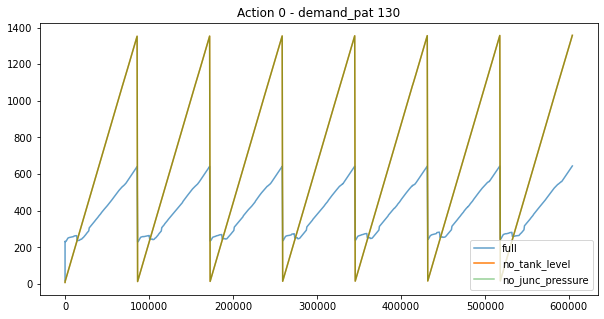

In [6]:
figure, ax = plt.subplots(figsize=[10,5])
lines, = ax.plot([results_full[0]['q_values'][i][0][0] + 86400 * (results_full[0]['q_values'][i][0][1] - 1) for i in range(len(results_full[0]['q_values']))],
                [results_full[0]['q_values'][i][1][0] for i in range(len(results_full[0]['q_values']))],
                label='full', alpha=0.7)
lines, = ax.plot([results_notanklevel[0]['q_values'][i][0][0] + 86400 * (results_notanklevel[0]['q_values'][i][0][1] - 1) for i in range(len(results_notanklevel[0]['q_values']))],
                [results_notanklevel[0]['q_values'][i][1][0] for i in range(len(results_notanklevel[0]['q_values']))],
                label='no_tank_level')
lines, = ax.plot([results_nojuncpressure[0]['q_values'][i][0][0] + 86400 * (results_nojuncpressure[0]['q_values'][i][0][1] - 1) for i in range(len(results_nojuncpressure[0]['q_values']))],
                [results_nojuncpressure[0]['q_values'][i][1][0] for i in range(len(results_nojuncpressure[0]['q_values']))],
                label='no_junc_pressure', alpha=0.5)
ax.legend()
ax.set_title('Action 0 - demand_pat 130')

In [7]:
import seaborn as sns

def plot_model_heatmap(data, index, title='', color=None, annot=False, columns=['action 0', 'action 1', 'action 2', 'action 3']):   
    df = pd.DataFrame(data, index=index, columns=columns)
    
    figure, ax = plt.subplots(figsize=(10,7))
    if color:
        ax = sns.heatmap(df, cmap=color, annot=annot)
    else:
        ax = sns.heatmap(df, annot=annot)
    
    if title:
        ax.set_title(title)

In [79]:
def crop_dataset(model, seed):
    
    # Build the boolean list of timestep of q_values which are present also in dataset 
    time_idx = [model[seed]['dataset']['current_state'][i][:2] for i in range(len(model[seed]['dataset']))]
    qs_idx = [model[seed]['q_values'][i][0] for i in range(len(model[seed]['q_values']))]
    bool_idx = [True if time_idx[i] in qs_idx else False for i in range(len(model[seed]['dataset']))]

    # Select which data we want to keep based on the boolean list
    cropped_dataset = model[seed]['dataset'].copy()
    for i in cropped_dataset.index:
        if not bool_idx[i]:
            cropped_dataset.drop(axis=0, index=i, inplace=True)
    return cropped_dataset

In [83]:
dat_full = crop_dataset(results_full, 0)
dat_full['current_state']

0                        [0.0, 1.0, 0.0, 0.0, 0.0]
1       [0.0, 1.0, 3.0500748, 3.0476344, 85.35038]
2            [2.0, 1.0, 3.048419, 3.048, 84.71333]
3               [3.0, 1.0, 3.048, 3.048, 84.71315]
5             [1203.0, 1.0, 3.048, 3.048, 82.8128]
                           ...                    
1024       [83400.0, 7.0, 3.048, 3.048, 82.716156]
1025       [84000.0, 7.0, 3.048, 3.048, 82.716156]
1026       [84600.0, 7.0, 3.048, 3.048, 82.716156]
1027       [85200.0, 7.0, 3.048, 3.048, 82.716156]
1028       [85800.0, 7.0, 3.048, 3.048, 82.716156]
Name: current_state, Length: 989, dtype: object

Let's try to plot the heatmap of the Q-values to see how they evolve during the simulation.

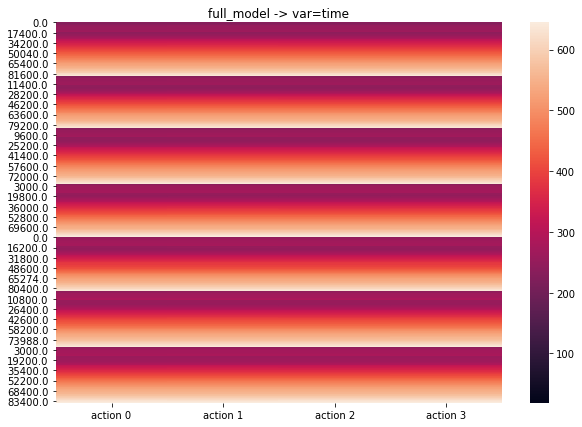

In [113]:
model = results_full
model = results_step_update
seed = 0

qs = [model[seed]['q_values'][i][1] for i in range(len(model[seed]['q_values']))]
index = [model[seed]['q_values'][i][0][0] for i in range(len(model[seed]['q_values']))]
# index = [model[seed]['q_values'][i][0][0] + 86400 * (model[seed]['q_values'][i][0][1] - 1) for i in range(len(model[seed]['q_values']))]

plot_model_heatmap(qs, index, title='full_model -> var=time')

Now we try to aggregate Q-values, choosing a certain interval of time, to see how the system behaves in that specific part of the day.

In [114]:
model = results_full
model = results_step_update
seed = 0
interval = 14400 # one hour
day = 86400

n_intervals = int(day / interval)

avg_q = {str(key): [0, 0, 0, 0] for key in range(n_intervals)}
count_q = {str(key): 0 for key in range(n_intervals)}

for q_step in model[seed]['q_values']:
    mod = str(int(q_step[0][0] // interval))
    avg_q[mod] = [avg_q[mod][i] + q_step[1][i] for i in range(len(avg_q[mod]))]
    count_q[mod] += 1

In [115]:
for i in avg_q.keys():
    avg_q[i] = [avg_q[i][j] / count_q[i] for j in range(4)]

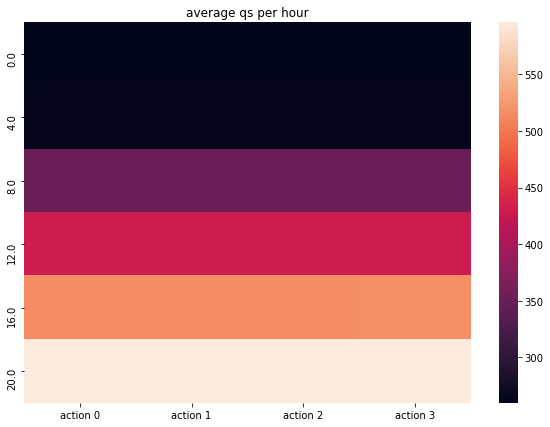

In [116]:
qs = list(avg_q.values())
index = [(0 + interval * i) / 3600 for i in range(n_intervals)]

plot_model_heatmap(qs, index, title='average qs per hour')

Now we want to print how the Q-values are distributed among the different days of the week.

In [117]:
model = results_full
model = results_step_update
seed = 0

avg_q = {str(key): [0, 0, 0, 0] for key in range(1,8)}
count_q = {str(key): 0 for key in range(1,8)}

for q_step in model[seed]['q_values']:
    mod = str(int(q_step[0][1]))
    avg_q[mod] = [avg_q[mod][i] + q_step[1][i] for i in range(len(avg_q[mod]))]
    count_q[mod] += 1

In [118]:
for i in avg_q.keys():
    avg_q[i] = [avg_q[i][j] / count_q[i] for j in range(4)]

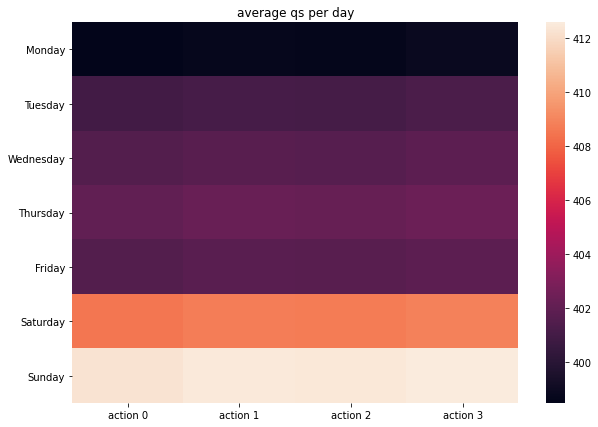

In [119]:
qs = list(avg_q.values())
index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plot_model_heatmap(qs, index, title='average qs per day')

Now we want to split in discrete intervals the value of the level of tank 41. We will plot the heatmap of Q-values associated with each interval.

In [129]:
model = results_full
model = results_step_update
seed = 0

tank41_levels = [model[seed]['dataset']['current_state'][i][2] for i in range(1, len(model[seed]['dataset']))]
max_level = max(tank41_levels)
min_level = min(tank41_levels)

print("min level: ", min_level)
print("max level: ", max_level)

interval = (max_level - min_level) / 8

avg_q = {str(key): [0, 0, 0, 0] for key in range(9)}
count_q = {str(key): 0 for key in range(9)}

tmp_dataset = crop_dataset(model, seed).iloc[1: , :]


for i, q_step in enumerate(model[seed]['q_values'][1:]):
    mod = str(int((tmp_dataset['current_state'].iloc[i][2] - min_level) // interval))
    avg_q[mod] = [avg_q[mod][j] + q_step[1][j] for j in range(len(avg_q[mod]))]
    count_q[mod] += 1

min level:  3.0470524
max level:  7.0871687


In [130]:
count_q

{'0': 761,
 '1': 24,
 '2': 32,
 '3': 20,
 '4': 27,
 '5': 37,
 '6': 53,
 '7': 11,
 '8': 1}

In [131]:
for i in avg_q.keys():
    avg_q[i] = [avg_q[i][j] / count_q[i] for j in range(4)]

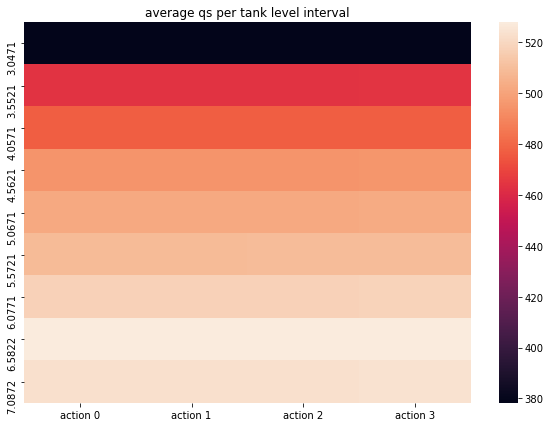

In [132]:
qs = list(avg_q.values())
index = [str(round(min_level + int(key) * interval, 4)) for key in avg_q.keys()]

plot_model_heatmap(qs, index, title='average qs per tank level interval')

Considering one action at time, we want know to see the correlation between different variables in the state space. We are now trying to plot the heatmap to show these results.

In [136]:
# We can compare day_of_the_week and tank41_level for example each action
model = results_full
model = results_step_update
seed = 0

tank41_levels = [model[seed]['dataset']['current_state'][i][2] for i in range(1, len(model[seed]['dataset']))]
max_level = max(tank41_levels)
min_level = min(tank41_levels)

print("min level: ", min_level)
print("max level: ", max_level)

interval = (max_level - min_level) / 8
tmp_dataset = crop_dataset(model, seed).iloc[1:, :]

avg_q_list = []
count_q_list = []

for action in range(4):
    avg_q = {str(key): [0, 0, 0, 0, 0, 0, 0] for key in range(9)}
    count_q = {str(key): [0, 0, 0, 0, 0, 0, 0] for key in range(9)}   

    for i, q_step in enumerate(model[seed]['q_values'][1:]):
        mod = str(int((tmp_dataset['current_state'].iloc[i][2] - min_level) // interval))
        day = int(q_step[0][1]) - 1
        avg_q[mod][day] += q_step[1][action]
        count_q[mod][day] += 1
    
    avg_q_list.append(avg_q)
    count_q_list.append(count_q)

min level:  3.0470524
max level:  7.0871687


In [137]:
count_q_list

[{'0': [105, 105, 113, 109, 120, 114, 95],
  '1': [7, 3, 2, 3, 2, 2, 5],
  '2': [5, 3, 3, 3, 3, 3, 12],
  '3': [2, 4, 2, 3, 4, 2, 3],
  '4': [3, 4, 3, 4, 6, 3, 4],
  '5': [4, 4, 3, 12, 4, 6, 4],
  '6': [11, 10, 15, 0, 0, 12, 5],
  '7': [0, 0, 0, 0, 0, 0, 11],
  '8': [0, 0, 0, 0, 0, 0, 1]},
 {'0': [105, 105, 113, 109, 120, 114, 95],
  '1': [7, 3, 2, 3, 2, 2, 5],
  '2': [5, 3, 3, 3, 3, 3, 12],
  '3': [2, 4, 2, 3, 4, 2, 3],
  '4': [3, 4, 3, 4, 6, 3, 4],
  '5': [4, 4, 3, 12, 4, 6, 4],
  '6': [11, 10, 15, 0, 0, 12, 5],
  '7': [0, 0, 0, 0, 0, 0, 11],
  '8': [0, 0, 0, 0, 0, 0, 1]},
 {'0': [105, 105, 113, 109, 120, 114, 95],
  '1': [7, 3, 2, 3, 2, 2, 5],
  '2': [5, 3, 3, 3, 3, 3, 12],
  '3': [2, 4, 2, 3, 4, 2, 3],
  '4': [3, 4, 3, 4, 6, 3, 4],
  '5': [4, 4, 3, 12, 4, 6, 4],
  '6': [11, 10, 15, 0, 0, 12, 5],
  '7': [0, 0, 0, 0, 0, 0, 11],
  '8': [0, 0, 0, 0, 0, 0, 1]},
 {'0': [105, 105, 113, 109, 120, 114, 95],
  '1': [7, 3, 2, 3, 2, 2, 5],
  '2': [5, 3, 3, 3, 3, 3, 12],
  '3': [2, 4, 2, 3, 4, 

In [138]:
for avg_q in avg_q_list:
    for i in avg_q.keys():
        avg_q[i] = [avg_q[i][j] / count_q[i][j] if avg_q[i][j] > 0 else 0 for j in range(7)]

Text(0.5, 1.0, 'action 3 --> days - tank41_level')

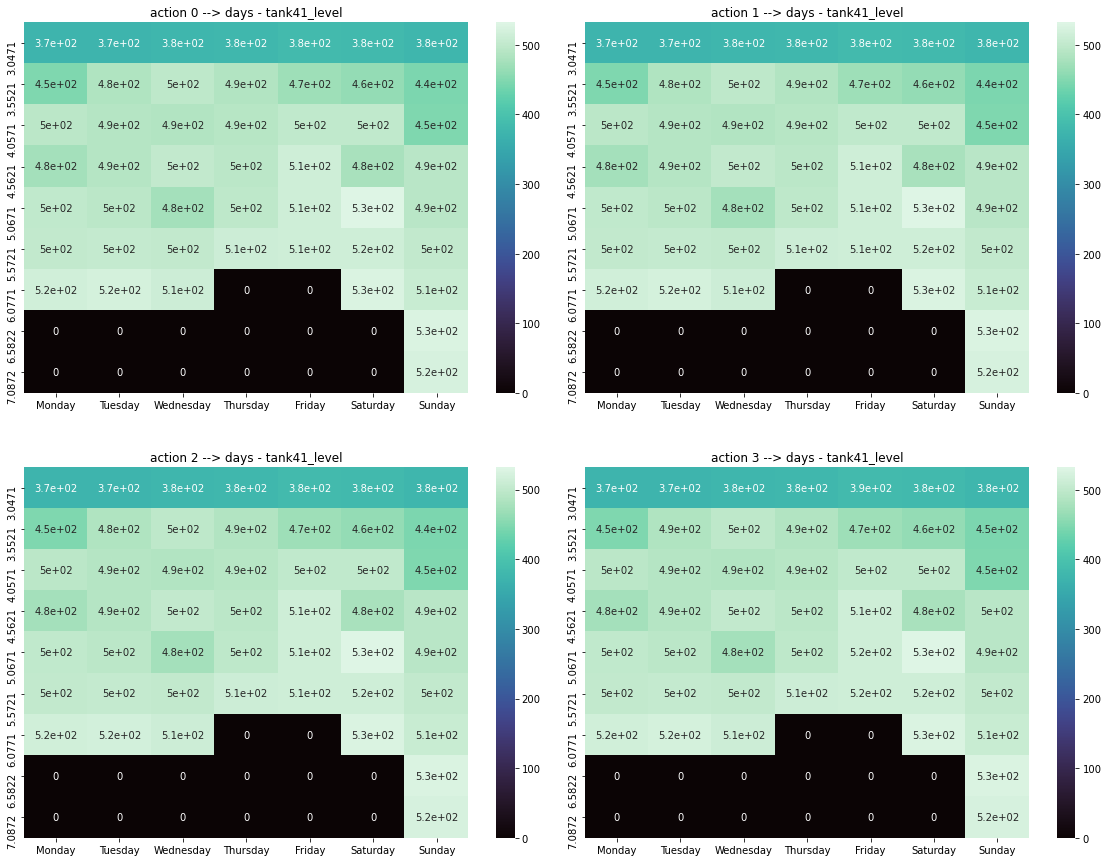

In [139]:
index = [str(round(min_level + int(key) * interval, 4)) for key in avg_q_list[0].keys()]
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

figure, axs = plt.subplots(2, 2, figsize=(20,15))
figure.subplots_adjust(hspace = .2, wspace=.01)

axs = axs.ravel()

for i in range(4):
    qs = list(avg_q_list[i].values())
    df = pd.DataFrame(qs, index=index, columns=columns)
    sns.heatmap(df, ax=axs[i], cmap='mako',annot=True)
       
axs[0].set_title("action 0 --> days - tank41_level")
axs[1].set_title("action 1 --> days - tank41_level")
axs[2].set_title("action 2 --> days - tank41_level")
axs[3].set_title("action 3 --> days - tank41_level")

We want to plot the occurrences of the actions given the tank41 level and the time

In [140]:
# We can compare time and tank41_level for example each action
model = results_full
model = results_step_update
seed = 0

tank41_levels = [model[seed]['dataset']['current_state'][i][2] for i in range(1, len(model[seed]['dataset']))]
max_level = max(tank41_levels)
min_level = min(tank41_levels)

print("min level: ", min_level)
print("max level: ", max_level)

interval = (max_level - min_level) / 8
tmp_dataset = crop_dataset(model, seed).iloc[1:, :]

count_q_list = []

for action in range(4):
    count_q = {str(key): [0] * 24 for key in range(9)}

    for i, q_step in enumerate(model[seed]['q_values'][1:]):
        mod = str(int((tmp_dataset['current_state'].iloc[i][2] - min_level) // interval))
        hour = int(q_step[0][0] // 3600)
        count_q[mod][hour] += 1
    
    count_q_list.append(count_q)

min level:  3.0470524
max level:  7.0871687


Text(0.5, 1.0, '#action 3 --> hour - tank41_level')

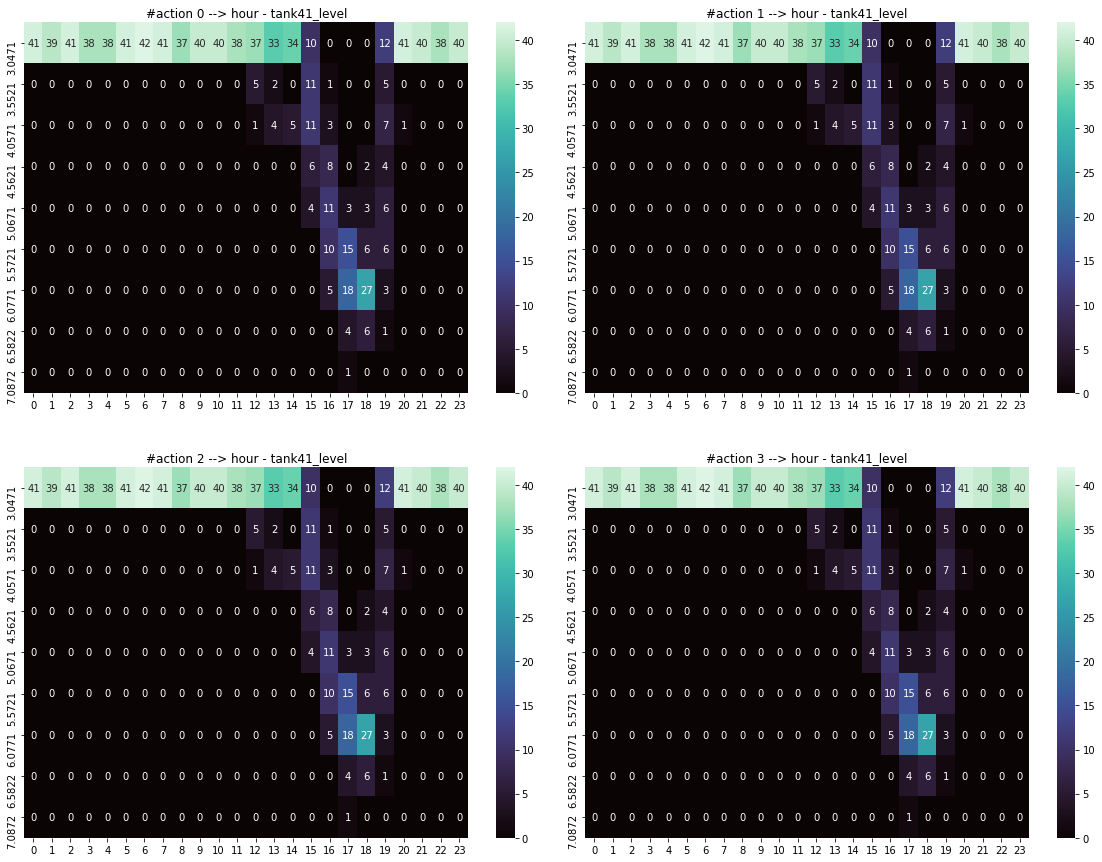

In [141]:
index = [str(round(min_level + int(key) * interval, 4)) for key in count_q_list[0].keys()]
columns = [str(i) for i in range(24)]

figure, axs = plt.subplots(2, 2, figsize=(20,15))
figure.subplots_adjust(hspace = .2, wspace=.01)

axs = axs.ravel()

for i in range(4):
    qs = list(count_q_list[i].values())
    df = pd.DataFrame(qs, index=index, columns=columns)
    sns.heatmap(df, ax=axs[i], cmap='mako',annot=True)
       
axs[0].set_title("#action 0 --> hour - tank41_level")
axs[1].set_title("#action 1 --> hour - tank41_level")
axs[2].set_title("#action 2 --> hour - tank41_level")
axs[3].set_title("#action 3 --> hour - tank41_level")

Let's see which are the action chosen in the different situations by the algorithm.

In [148]:
model = results_full
model = results_step_update
seed = 0

tank41_levels = [model[seed]['dataset']['current_state'][i][2] for i in range(1, len(model[seed]['dataset']))]
max_level = max(tank41_levels)
min_level = min(tank41_levels)

print("min level: ", min_level)
print("max level: ", max_level)

interval = (max_level - min_level) / 8
tmp_dataset = crop_dataset(model, seed).iloc[1:, :]

count_q_list = []

for action in range(4):
    count_q = {str(key): [0] * 24 for key in range(9)}

    for i in range(len(tmp_dataset)):
        if action == tmp_dataset.iloc[i]['action']:
            mod = str(int((tmp_dataset['current_state'].iloc[i][2] - min_level) // interval))
            hour = int(tmp_dataset['current_state'].iloc[i][0] // 3600)
            count_q[mod][hour] += 1
    
    count_q_list.append(count_q)

min level:  3.0470524
max level:  7.0871687


Text(0.5, 1.0, '#action 3 --> hour - tank41_level')

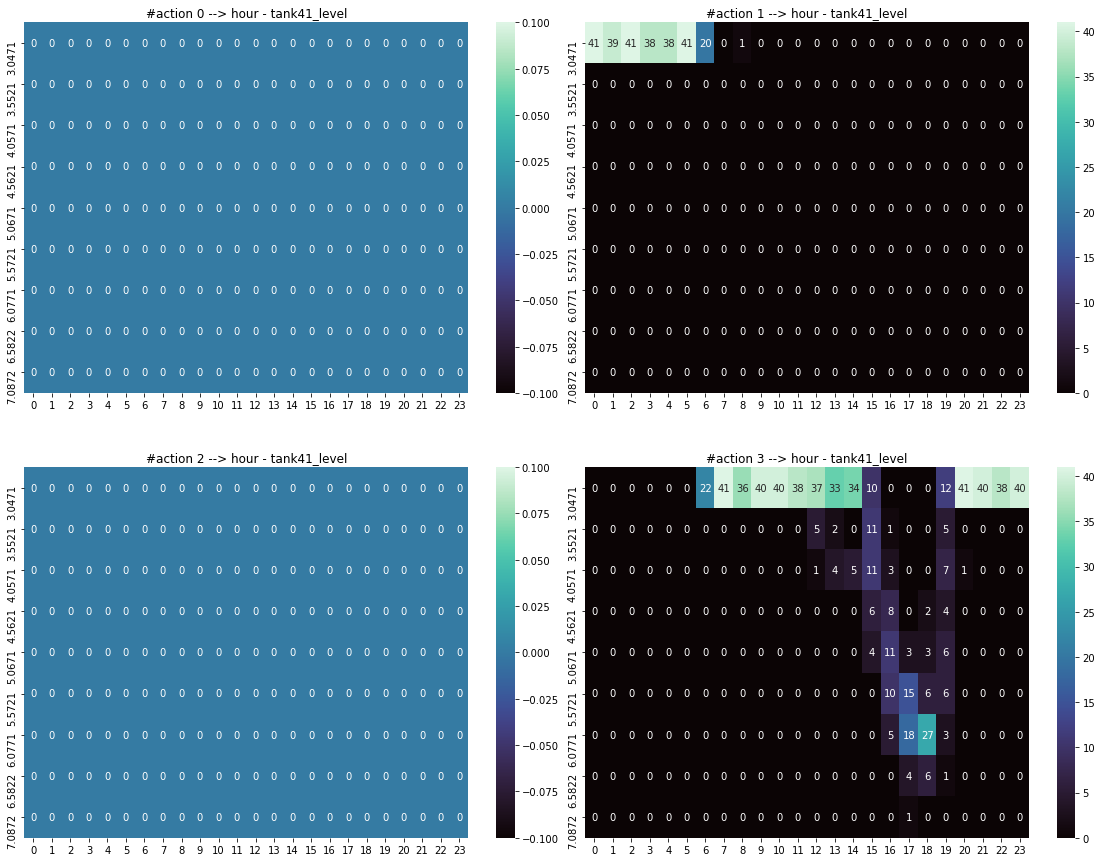

In [149]:
index = [str(round(min_level + int(key) * interval, 4)) for key in count_q_list[0].keys()]
columns = [str(i) for i in range(24)]

figure, axs = plt.subplots(2, 2, figsize=(20,15))
figure.subplots_adjust(hspace = .2, wspace=.01)

axs = axs.ravel()

for i in range(4):
    qs = list(count_q_list[i].values())
    df = pd.DataFrame(qs, index=index, columns=columns)
    sns.heatmap(df, ax=axs[i], cmap='mako',annot=True)
       
axs[0].set_title("#action 0 --> hour - tank41_level")
axs[1].set_title("#action 1 --> hour - tank41_level")
axs[2].set_title("#action 2 --> hour - tank41_level")
axs[3].set_title("#action 3 --> hour - tank41_level")

In [150]:
print(tmp_dataset['action'].to_string())

1       [1]
2       [1]
3       [1]
4       [1]
5       [1]
6       [1]
7       [1]
8       [1]
9       [1]
10      [1]
11      [1]
12      [1]
13      [1]
14      [1]
15      [1]
16      [1]
17      [1]
18      [1]
19      [1]
20      [1]
21      [1]
22      [1]
25      [1]
26      [1]
31      [1]
32      [1]
33      [1]
34      [1]
35      [1]
36      [1]
37      [1]
38      [1]
39      [1]
40      [3]
41      [3]
42      [3]
43      [3]
44      [3]
45      [3]
46      [3]
47      [3]
48      [3]
49      [3]
50      [3]
52      [3]
53      [3]
54      [3]
56      [3]
57      [3]
58      [3]
59      [3]
60      [3]
61      [3]
62      [3]
63      [3]
64      [3]
65      [3]
66      [3]
67      [3]
68      [3]
69      [3]
70      [3]
71      [3]
72      [3]
73      [3]
74      [3]
75      [3]
76      [3]
77      [3]
78      [3]
79      [3]
80      [3]
81      [3]
82      [3]
83      [3]
84      [3]
85      [3]
87      [3]
88      [3]
89      [3]
90      [3]
91      [3]
92      [3]
93  

In [1]:
df = pd.DataFrame(data, index=index, columns=columns)
    
    figure, ax = plt.subplots(figsize=(10,7))
    if color:
        ax = sns.heatmap(df, cmap=color, annot=annot)
    else:
        ax = sns.heatmap(df, annot=annot)
    
    if title:
        ax.set_title(title)

IndentationError: unexpected indent (<ipython-input-1-06b60861d836>, line 3)

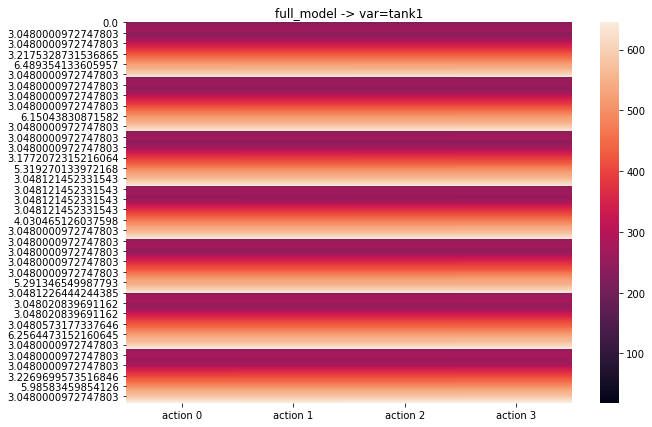

In [77]:
model = results_full
seed = 0

qs = [model[seed]['q_values'][i][1] for i in range(len(model[seed]['q_values']))]
tmp_dataset = crop_dataset(model, seed)
index = [tmp_dataset[i][2] for i in range(len(tmp_dataset))]

plot_model_heatmap(qs, index, title='full_model -> var=tank1')

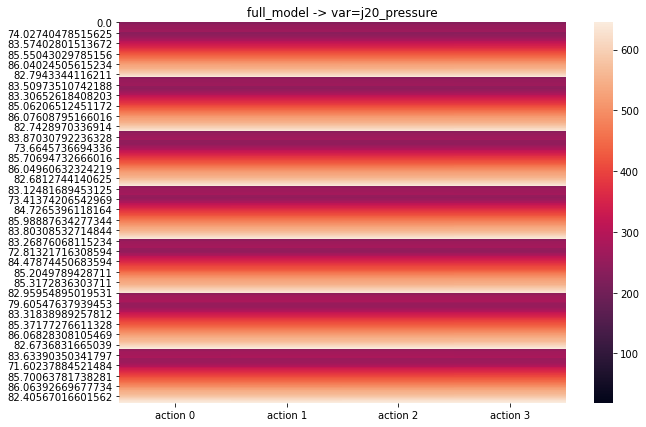

In [78]:
model = results_full
seed = 0

qs = [model[seed]['q_values'][i][1] for i in range(len(model[seed]['q_values']))]
tmp_dataset = crop_dataset(model, seed)
index = [tmp_dataset[i][4] for i in range(len(tmp_dataset))]

plot_model_heatmap(qs, index, title='full_model -> var=j20_pressure')

##### Let's see the amount of the maximum difference between two action of the same sample

In [79]:
models = [results_full, results_notime, results_noday, results_notanklevel, results_nojuncpressure]
max_q_diff = []  

for model in models:
    for seed in range(5):
        max_q_diff.append(max([max(model[seed]['q_values'][i][1]) - min(model[seed]['q_values'][i][1]) for i in range(len(model[seed]['q_values']))]))

In [80]:
max_q_diff

[0.9105224609375,
 0.919281005859375,
 0.9156494140625,
 0.924896240234375,
 0.924896240234375,
 0.16986656188964844,
 0.16986656188964844,
 0.16986656188964844,
 0.16986656188964844,
 0.16986656188964844,
 2.786865234375,
 2.797607421875,
 2.786865234375,
 2.786865234375,
 2.7978515625,
 1.2595996856689453,
 1.259592056274414,
 1.25872802734375,
 1.2595653533935547,
 1.2595844268798828,
 1.2595996856689453,
 1.259592056274414,
 1.25872802734375,
 1.2595653533935547,
 1.2595844268798828]

Since we don't have a huge difference between the Q-values of different actions with respect to their actual Q-values, heatmaps won't give us meaningful results.

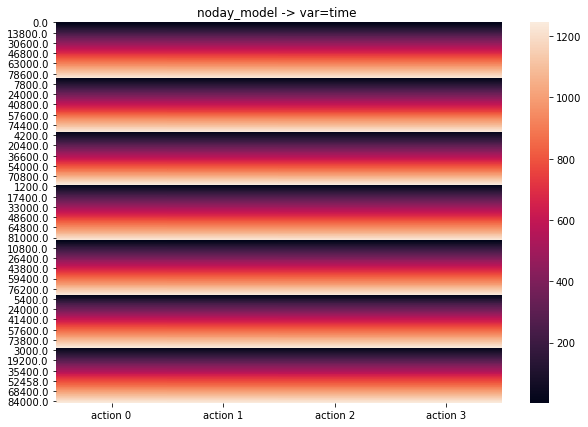

In [81]:
model = results_noday
seed = 4

qs = [model[seed]['q_values'][i][1] for i in range(len(model[seed]['q_values']))]
index = [model[seed]['q_values'][i][0][0] for i in range(len(model[seed]['q_values']))]

plot_model_heatmap(qs, index, title='noday_model -> var=time ')

##### Let's see how big are the q-values for the different models

In [82]:
models = [results_full, results_notime, results_noday, results_notanklevel, results_nojuncpressure]
max_qs = []
min_qs = []

for model in models:
    for seed in range(5):
        max_qs.append(max([max(model[seed]['q_values'][i][1]) for i in range(len(model[seed]['q_values']))]))
        min_qs.append(min([min(model[seed]['q_values'][i][1]) for i in range(len(model[seed]['q_values']))]))

In [83]:
max_qs, min_qs

([644.8926391601562,
  645.296630859375,
  644.940185546875,
  645.2981567382812,
  645.2955932617188,
  105.05526733398438,
  105.25029754638672,
  106.92715454101562,
  105.40074157714844,
  105.30223083496094,
  1239.677490234375,
  1244.968017578125,
  1239.677490234375,
  1239.677490234375,
  1245.18359375,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875],
 [18.866453170776367,
  18.866453170776367,
  18.866453170776367,
  18.866453170776367,
  18.866453170776367,
  6.5227370262146,
  6.5227370262146,
  6.5227370262146,
  6.5227370262146,
  6.5227370262146,
  3.2363855838775635,
  3.6130082607269287,
  3.2363855838775635,
  3.2363855838775635,
  3.2363855838775635,
  8.234898567199707,
  8.234898567199707,
  8.234898567199707,
  8.234898567199707,
  8.234898567199707,
  8.234898567199707,
  8.234898567199707,
  8

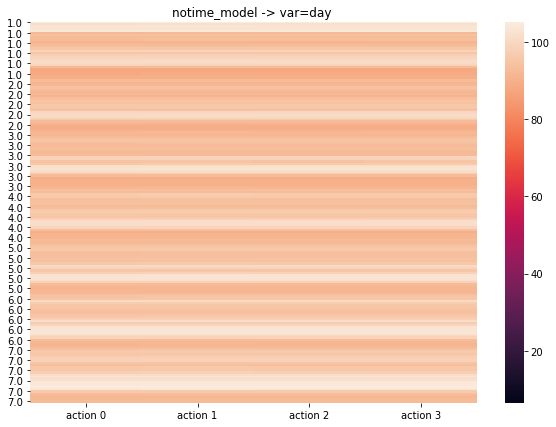

In [84]:
model = results_notime
seed = 0

qs = [model[seed]['q_values'][i][1] for i in range(len(model[seed]['q_values']))]
index = [model[seed]['q_values'][i][0][0] for i in range(len(model[seed]['q_values']))]

plot_model_heatmap(qs, index, title='notime_model -> var=day ')

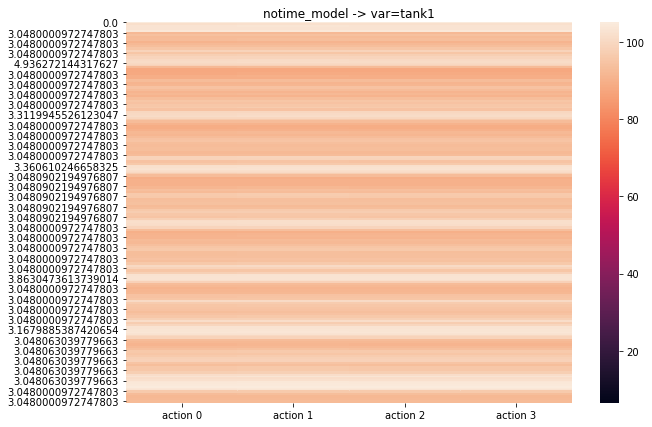

In [85]:
model = results_notime
seed = 0

qs = [model[seed]['q_values'][i][1] for i in range(len(model[seed]['q_values']))]
index = [model[seed]['q_values'][i][0][1] for i in range(len(model[seed]['q_values']))]

plot_model_heatmap(qs, index, title='notime_model -> var=tank1')

In [86]:
model[0]['dataset']

,current_state,action,reward,next_state,absorbing_state,last_step
0,"[1.0, 0.0, 0.0, 0.0]",[3],1.000000,"[1.0, 3.0500748, 3.0476344, 85.35038]",False,False
1,"[1.0, 3.0500748, 3.0476344, 85.35038]",[1],0.968062,"[1.0, 3.048419, 3.048, 84.71333]",False,False
2,"[1.0, 3.048419, 3.048, 84.71333]",[1],0.968056,"[1.0, 3.048, 3.048, 84.71315]",False,False
3,"[1.0, 3.048, 3.048, 84.71315]",[1],0.838435,"[1.0, 3.048, 3.048, 82.8128]",False,False
4,"[1.0, 3.048, 3.048, 82.8128]",[2],0.838435,"[1.0, 3.048, 3.048, 82.8128]",False,False
...,...,...,...,...,...,...
1015,"[7.0, 3.048, 3.048, 70.70122]",[1],0.751213,"[7.0, 3.048, 3.048, 70.70122]",False,False
1016,"[7.0, 3.048, 3.048, 70.70122]",[1],0.751213,"[7.0, 3.048, 3.048, 70.70122]",False,False
1017,"[7.0, 3.048, 3.048, 70.70122]",[1],0.751213,"[7.0, 3.048, 3.048, 70.70122]",False,False
1018,"[7.0, 3.048, 3.048, 70.70122]",[1],0.751213,"[7.0, 3.048, 3.048, 70.70122]",False,False
